In [1]:
# 從sklearn中取出數據討論perceptron
# 取出鳶尾花
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
iris.get('feature_names')

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
import pandas as pd
# 僅取前面100筆數
X = pd.DataFrame(iris.data, columns=['sepal length (cm)',
                                     'sepal width (cm)',
                                     'petal length (cm)',
                                     'petal width (cm)'])[:100]     
# 對應種類前面100筆數
y = iris.target[:100]

# 合併特徵(features) 與 種類(target)
X['target'] = y

# 匯出成CSV
#X.to_csv('iris.csv', index=False)

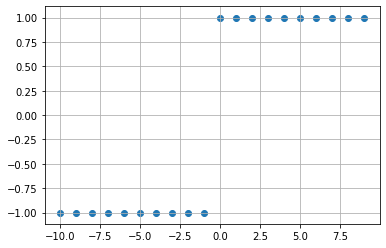

In [4]:
%matplotlib inline
# activation function
import matplotlib.pyplot as plt
def phi(z):
    if z >=0:
        return(1)
    else:
        return(-1)
    
data = range(-10, 10, 1)
result = [phi(z) for z in data]
plt.scatter(data, result)
plt.grid()
plt.show()


In [12]:
#class 觀念與感知器的使用 = logistic regression algorithm
# eta   : 每一次 權重*數據 比對 正確性 之後的修正比率
# n_iter: 針對所有的數據 要跑幾輪 epochs
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter): # 被要求的迴圈次數 10 輪 
            errors = 0
            print(_ ,'th', self.w_)  # _th 次的權重 = model = 模型
            for xi, target in zip(X, y):      # 根據資料筆數跑回圈 該迴圈自我修正 w 參數
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi    # 多少欄位 特徵值 花萼長度 + 花瓣長度
                self.w_[0] += update          # 固定的 w0 權重
                errors += int(update != 0.0)  # 如果預測跟原先的y值 不同就紀錄起來多少錯誤
            self.errors_.append(errors)       # 最後計算結果 就會記錄到erros_ list
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [13]:
# 針對iris 2/4 個特徵
import numpy as np
X = iris.data[:, [0,1]][:100]
y = np.where(iris.target[:100]==1, 1, -1)

# 資料處理
# zscore : mean = 0, std = 1
# (xi - mean) / std
XZ = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
np.mean(XZ, axis=0), np.std(XZ, axis=0)

(array([-1.51822999e-15,  4.66293670e-16]), array([1., 1.]))

0 th [0. 0. 0.]
1 th [ 0.02        0.02283542 -0.0419449 ]
2 th [ 0.02        0.05415973 -0.06713704]
3 th [ 0.02        0.06668945 -0.06293835]
4 th [ 0.02        0.07921917 -0.05873966]
5 th [ 0.02        0.07921917 -0.05873966]
6 th [ 0.02        0.07921917 -0.05873966]
7 th [ 0.02        0.07921917 -0.05873966]
8 th [ 0.02        0.07921917 -0.05873966]
9 th [ 0.02        0.07921917 -0.05873966]
Final [ 0.02        0.07921917 -0.05873966]


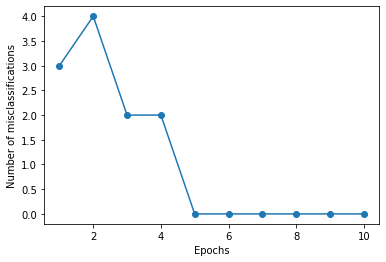

In [16]:
# 針對iris 2/4 個特徵
import numpy as np
X = iris.data[:, [0,1]][:100]
y = np.where(iris.target[:100]==1, 1, -1)

# 資料處理
# zscore : mean = 0, std = 1
# (xi - mean) / std
XZ = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(XZ, y) # 當使用standardized data(XZ) 加速收斂 , 否則需要花費很多時間處理 X

print('Final',ppn.w_)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_ , marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [17]:
# final weight 
print(ppn.w_)
np.sum(ppn.predict(XZ)==y) / len(y)

[ 0.02        0.07921917 -0.05873966]


1.0